<a href="https://colab.research.google.com/github/jessicasalazar/Optimization/blob/main/01_taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1
## Modelos y Métodos de Optimización
#### Nombre: Jessica Salazar Vásquez
#### Profesor: Juan Carlos Duque

In [ ]:
# Instalación de librerías
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [ ]:
# carga de archivos desde el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar librerías
from pyomo.environ import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 0. Escenario modelo original

Datos del problema:
1.	Ingredientes disponibles:
    - Harina: 10 kg.
    - Azúcar: 6 kg.
2.	Requerimientos por tipo de galleta (por lote):
    + Chocolate:
        - Harina: 2 kg.
        - Azúcar: 1 kg.
    + Avena:
        - Harina: 1 kg.
        - Azúcar: 1.5 kg.
3.	Ganancia por lote:
    + Galletas de Chocolate: $30 por lote.
    + Galletas de Avena: $20 por lote.

Pregunta:

¿Cuántos lotes de cada tipo de galleta debe producir la fábrica para maximizar las ganancias, respetando las restricciones de ingredientes?

### 0.1. Formulación del modelo orignal

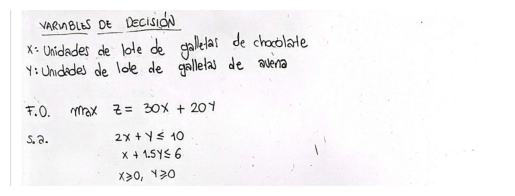

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_0.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### 0.2. Optimización del modelo original

In [ ]:
# Crear el modelo
model = ConcreteModel()

# Declarar las variables de decisión
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Declarar la función objetivo
model.profit = Objective(expr = 30*model.x + 20*model.y, sense=maximize)

# Declarar las restricciones
model.laborA = Constraint(expr = 2*model.x + model.y <= 10)
model.laborB = Constraint(expr = model.x + 1.5*model.y <= 6)

In [ ]:
# Mostrar los resultados de Optimización
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 155.0
  Upper bound: 155.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of nonzeros: 4
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.007177114486694336
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

### 0.3. Análisis gráfico y análisis de resultados del modelo original

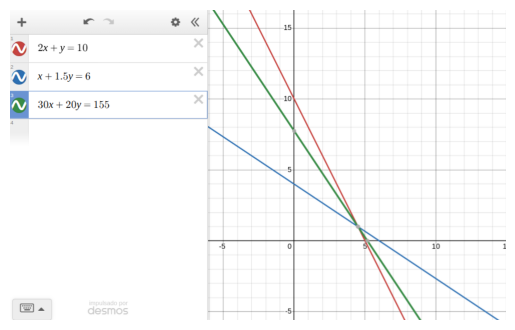

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_0.png')
plt.imshow(img)
plt.axis('off')
plt.show()

El escenario del modelo original tiene un óptimo para las variables de decisión de: x = 4.5, y = 1. Es decir producir 4.5 lotes de galletas de chocolate y 1 lote de galletas de avena maximiza la ganancia de la fabrica. El tiempo del solver para encontrar el óptimo fueron 0.0056 segundos.

# 1. Incorporar Costos de Producción

Contexto:

Cada tipo de galleta tiene un costo de producción por lote, y los recursos disponibles también tienen un costo asociado. Ahora, el objetivo es maximizar la ganancia neta.

+ Datos adicionales:
        - Costo de producir un lote de galletas de Chocolate: $10.
        - Costo de producir un lote de galletas de Avena: $8.
        - Costo de compra de harina: $2 por kg.
        - Costo de compra de azúcar: $3 por kg.

Tarea:

Maximizar la ganancia neta, teniendo en cuenta los costos de producción y de compra de los ingredientes. Opcionalmente, pueden limitar la cantidad de dinero disponible para comprar harina y azúcar.

### 1.1. Formulación del modelo - punto 1

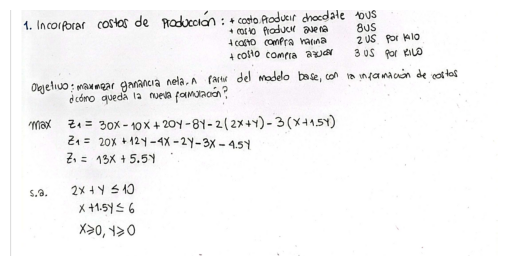

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### 1.2. Optimización del punto 1

In [ ]:
# Crear el modelo
model = ConcreteModel()

# Declarar las variables de decisión
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Declarar la función objetivo
model.profit = Objective(expr = 13*model.x + 5.5*model.y, sense=maximize)

# Declarar las restricciones
model.laborA = Constraint(expr = 2*model.x + model.y <= 10)
model.laborB = Constraint(expr = model.x + 1.5*model.y <= 6)

In [ ]:
# Mostrar los resultados de Optimización
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 65.0
  Upper bound: 65.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of nonzeros: 4
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.023479461669921875
# ----------------------------------------------------------
#   Solution Information
# --------------------------------------

### 1.3. Análisis gráfico y análisis de resultados del punto 1

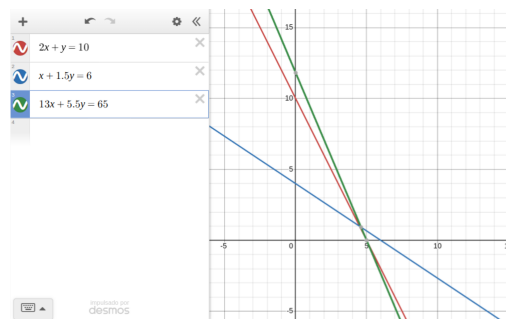

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Al incorporar costos de producción, el escenario óptimo que maximiza las ganancias son x = 5, y = 0. Es decir, solo producir lotes de galletas de chocolate. El tiempo del solver para encontrar el óptimo fueron 0.0069 segundos.

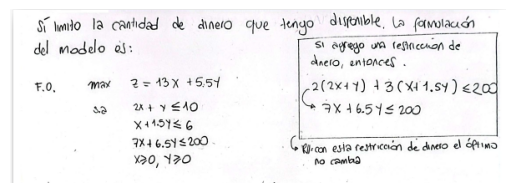

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_1_2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

En este escenario, sí agregamos esa restricción de dinero disponible, no cambia el óptimo.

# 2. Introducir Demandas Mínimas y Máximas

Contexto:

La fábrica tiene acuerdos comerciales que requieren producir al menos cierta cantidad de cada tipo de galleta, pero también hay un límite en la capacidad de producción.
  + Restricciones nuevas:
        - Debe producirse al menos 2 lotes de Chocolate.
        - Debe producirse al menos 1 lote de Avena.
        - No se pueden producir más de 5 lotes de Chocolate ni más de 4 lotes de Avena debido a limitaciones de espacio.
        
Tarea:

Reformular y resolver el modelo con estas nuevas restricciones de demanda y capacidad.

### 2.1. Formulación del modelo - punto 2

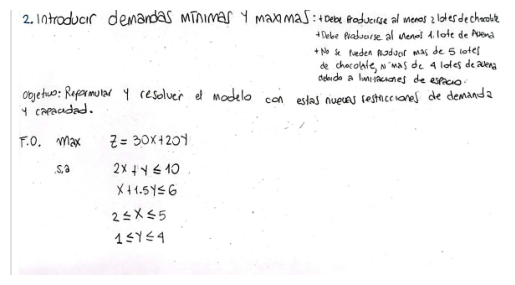

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### 2.2. Optimización del punto 2

In [ ]:
# Crear el modelo
model = ConcreteModel()

# Declarar las variables de decisión
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Declarar la función objetivo
model.profit = Objective(expr = 30*model.x + 20*model.y, sense=maximize)

# Declarar las restricciones
model.laborA = Constraint(expr = 2*model.x + model.y <= 10)
model.laborB = Constraint(expr = model.x + 1.5*model.y <= 6)
model.laborC = Constraint(expr = model.x >= 2)
model.laborD = Constraint(expr = model.x <= 5)
model.laborE = Constraint(expr = model.y >= 1)
model.laborF = Constraint(expr = model.y <= 4)

In [ ]:
# Mostrar los resultados de Optimización
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 155.0
  Upper bound: 155.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 2
  Number of nonzeros: 8
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.030223608016967773
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

### 2.3. Análisis gráfico y análisis de resultados del punto 2

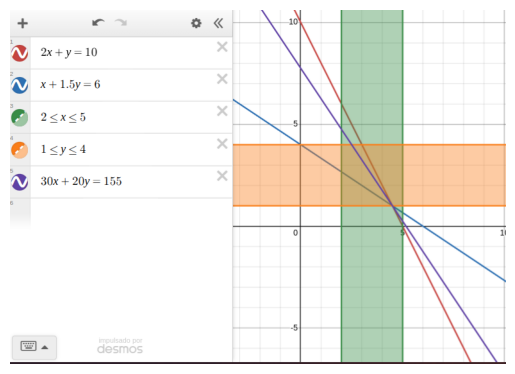

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

El resultado de optimización no cambia al introducir demandas mínimas y máximas, respecto al modelo original. Para maximizar la ganancia de la fabrica x = 4.5, y = 1. El tiempo del solver para encontrar el óptimo fueron 0.0057 segundos.

# 3. Considerar Tiempo de Producción

Contexto:

Cada tipo de galleta requiere un tiempo de preparación. La fábrica tiene un límite diario de horas de producción.
  + Datos adicionales:
        - Tiempo de producción por lote de Chocolate: 1 hora.
        - Tiempo de producción por lote de Avena: 1.5 horas.
        - Tiempo disponible: 8 horas por día.

Tarea:

Incorporar el tiempo de producción como una restricción adicional y determinar la producción óptima.

### 3.1. Formulación del modelo - punto 3

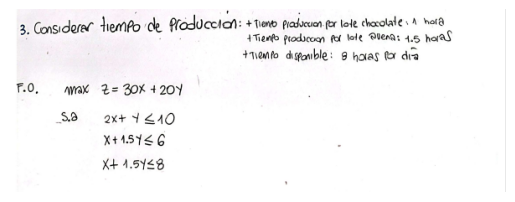

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### 3.2. Optimización del punto 3

In [ ]:
# Crear el modelo
model = ConcreteModel()

# Declarar las variables de decisión
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Declarar la función objetivo
model.profit = Objective(expr = 30*model.x + 20*model.y, sense=maximize)

# Declarar las restricciones
model.laborA = Constraint(expr = 2*model.x + model.y <= 10)
model.laborB = Constraint(expr = model.x + 1.5*model.y <= 6)
model.laborC = Constraint(expr = model.x + 1.5*model.y <= 8)

In [ ]:
# Mostrar los resultados de Optimización
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 155.0
  Upper bound: 155.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 6
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.03184151649475098
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

### 3.3.Análisis gráfico y análisis de resultados del punto 3

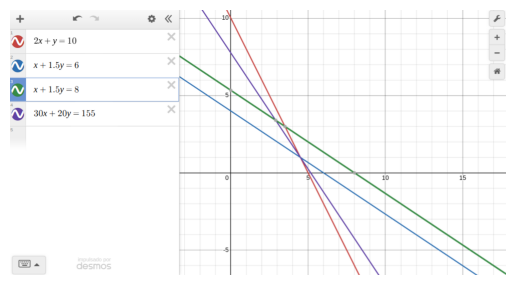

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

El resultado de optimización no cambia al considerar el tiempo de producción, con respecto del modelo original. Para maximizar la ganancia de la fabrica es x = 4.5, y = 1. El tiempo del solver para encontrar el óptimo fue de 0.0049 segundos.

# 4. Optimización Multiobjetivo

Contexto:

Además de maximizar las ganancias, la fábrica quiere minimizar el consumo de harina y azúcar para reducir el impacto ambiental.

Tarea:

Reformular el problema como un modelo multiobjetivo:
  - Maximizar la ganancia total.
  - Minimizar el consumo total de ingredientes.
  - Encuentre un trade-off entre estos objetivos utilizando métodos como ponderación de objetivos o restricciones.

### 4.1. Formulación del modelo - punto 4

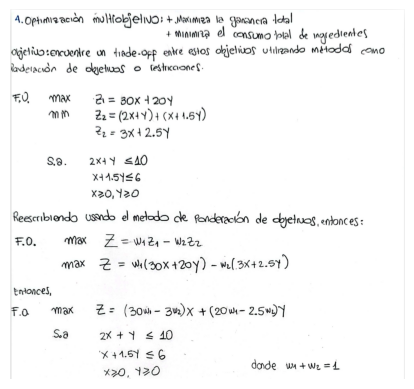

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_4.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# 5. Considerar Restricciones de Calidad

Contexto:

Para garantizar la calidad, al menos el 50% de los lotes producidos deben ser de Chocolate.

Tarea:

Incorporar la restricción de calidad y resolver el modelo.

### 5.1. Formulación del modelo - punto 5

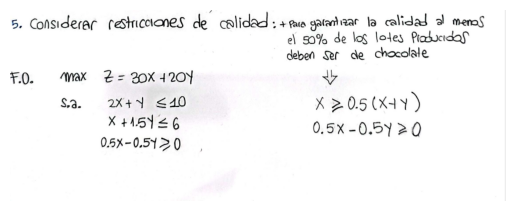

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_5.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### 5.2. Optimización del punto 5

In [ ]:
# Crear el modelo
model = ConcreteModel()

# Declarar las variables de decisión
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Declarar la función objetivo
model.profit = Objective(expr = 30*model.x + 20*model.y, sense=maximize)

# Declarar las restricciones
model.laborA = Constraint(expr = 2*model.x + model.y <= 10)
model.laborB = Constraint(expr = model.x + 1.5*model.y <= 6)
model.laborC = Constraint(expr = 0.5*model.x - 0.5*model.y >= 0)

In [ ]:
# Mostrar los resultados de Optimización
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 155.0
  Upper bound: 155.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 6
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.006959438323974609
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

### 5.3. Análisis gráfico y análisis de resultados del punto 5

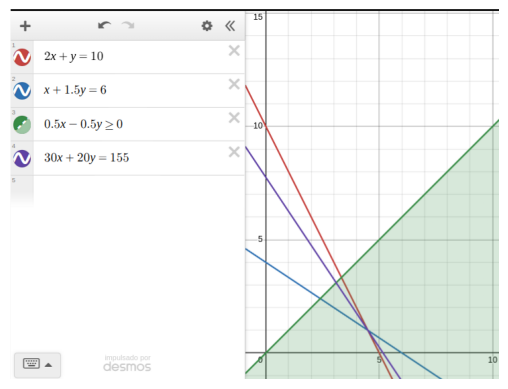

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_5.png')
plt.imshow(img)
plt.axis('off')
plt.show()

El resultado de optimización no cambia al considerar la restricción de calidad, con respecto del modelo original. Para maximizar la ganancia de la fabrica es x = 4.5, y = 1. El tiempo del solver para encontrar el óptimo fue de 0.0055 segundos.

# 6. Introducir Incertidumbre

Contexto:

Los precios de venta de las galletas o la disponibilidad de harina y azúcar pueden variar.

   + Datos adicionales:
        - Precio de venta del Chocolate puede ser $25 o $35 con igual probabilidad.
        - Disponibilidad de harina varía entre 8 y 12 kg.

Tarea:

Reformular el problema como un modelo de optimización robusta o discutir soluciones bajo escenarios diferentes.

### 6.1. Formulación del modelo - punto 6

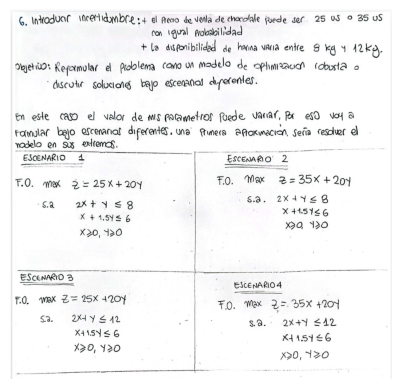

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_6.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### 6.2. Optimización del punto 6

Resultados de optimización
___________________________

Escenario 1:
x=3
y=2

Escenario 2:
x=3
y=2

Escenario 3:
x=6
y=0

Escenario 4:
x=6
y=0

### 6.3. Análisis gráfico y análisis de resultados del punto 6

Las gráficas de los escenarios estan en orden de izquierda a derecha y de arriba a abajo.

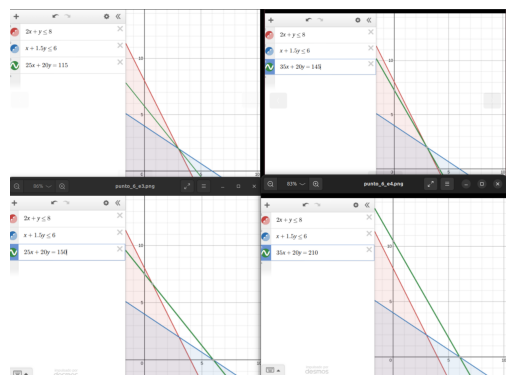

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_6.png')
plt.imshow(img)
plt.axis('off')
plt.show()

De acuerdo a los resultados de los óptimos de los 4 escenarios, este problema es mas sensible a la variación de la disponibilidad de harina, que a la variación del precio del lote de galletas de chocolate. Esto debido a que cambios en el precio no modifica el óptimo con una misma disponibilidad de insumos, mientras que la variación en harina disponible sí modifica el óptimo en ambos valores extremos del precio.

# 7. Optimización Dinámica

Contexto:

La producción se realiza a lo largo de 4 semanas, y las decisiones de producción de cada semana afectan la disponibilidad de recursos para la semana siguiente.

  + Datos adicionales:
        - Recursos iniciales: 40 kg de harina, 24 kg de azúcar.
        - Cada semana, la fábrica puede comprar un máximo de 10 kg adicionales de harina y 6 kg de azúcar.
        - Los productos no vendidos al final de cada semana generan un costo de almacenamiento de $2 por lote.

Tarea:

Diseñar un plan de producción para maximizar la ganancia total en el mes, teniendo en cuenta las restricciones dinámicas. Pista: necesitaras un subíndice “t” para el manejo temporal.

### 7.1. Formulación del modelo - punto 7

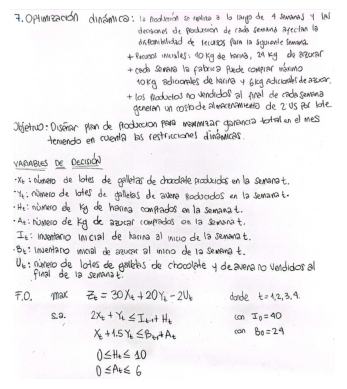

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/formulacion_7.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# 8. Investigar en qué consiste el algoritmo Branch and Bound y el concepto del Gap en optimización lineal.

**El algoritmo Branch and Bound** es una técnica de optimización, que es un método muy conocido para resolver problemas de optimización discretos principalmente. En general, el algoritmo Branch and Bound es  utilizado para resolver problemas combinatorios y de programación entera, aunque no necesariamente sea el método más eficiente, pero por como permite encontrar soluciones óptimas, es un método efectivo.

Su funcionamiento se basa en tres pasos fundamentales:

+ Branching (Ramificación):
Se divide el problema original en subproblemas más pequeños. Esta partición crea un árbol de búsqueda donde cada nodo representa un subproblema derivado del original.



+ Bounding (Cálculo de Límites):
Para cada subproblema, se calcula un límite (o cota) que estima la mejor solución posible que se podría obtener en ese subespacio. Este límite puede ser superior o inferior, dependiendo de si el problema es de maximización o minimización.

+ Pruning (Poda):
Si el límite calculado para un subproblema indica que no puede mejorar la mejor solución encontrada hasta el momento, se descarta ese nodo y todas sus ramas. Esto evita la exploración de partes del espacio de soluciones que no conducirán a una solución óptima.

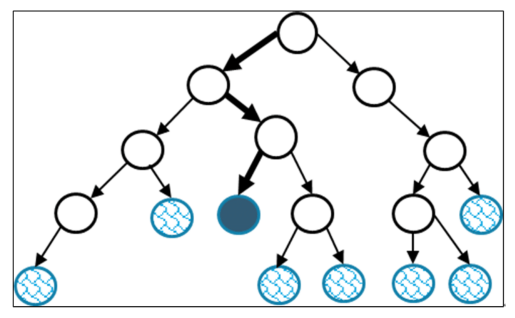

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_8_2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

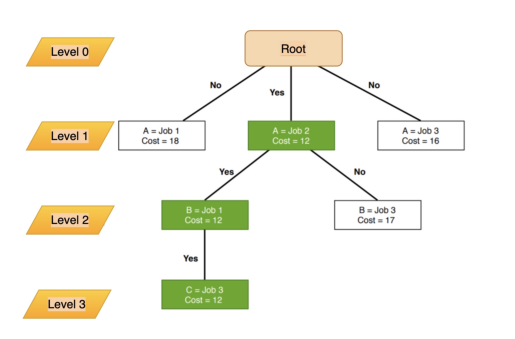

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_8_1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

De esta manera, Branch and Bound reduce el número de soluciones a evaluar y, a través de una búsqueda sistemática y selectiva, permite encontrar la solución óptima de forma más eficiente.

En el contexto de la optimización, **el término "Gap"** se utiliza para cuantificar la diferencia entre dos valores relevantes que nos ayudan a evaluar la calidad de una solución. Dependiendo del problema y del contexto, podemos hablar de distintos tipos de gap:

+ **Duality Gap** (Brecha de Dualidad):
En problemas de programación lineal, la teoría de la dualidad establece que, bajo ciertas condiciones (como la existencia de soluciones factibles y la convexidad del problema), el valor óptimo del problema primal es igual al valor óptimo de su problema dual. Es decir, el duality gap es:


Duality Gap
=
𝑧
primal
∗
−
𝑧
dual
∗
=
0.


Esto significa que, en programación lineal, si se cumplen los requisitos teóricos, no existe brecha entre las dos formulaciones.

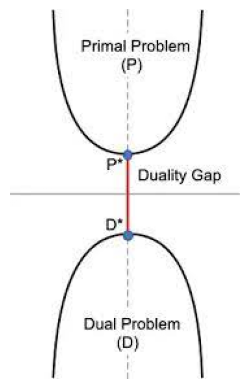

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Doctorado/Cursos/Modelos_metodos_optimizacion/taller_1/Imagenes/punto_8_3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

+ **Optimality Gap** (Brecha de Optimalidad) o Integrality Gap:
En problemas de programación entera o mixto-entera, el gap se utiliza para medir la diferencia entre:

La mejor solución factible encontrada (con restricciones de integridad) y
La cota obtenida del problema relajado (donde se han eliminado o relajado las restricciones de integridad).
Por ejemplo, en un problema de minimización se define de la siguiente manera:

Optimality Gap (%)
=
𝑧
factible
−
𝑧
cota
𝑧
factible
×
100
,

donde:

𝑧
factible
​: es el valor de la mejor solución entera encontrada, y
𝑧
cota
​: es la cota inferior obtenida (usualmente a partir del problema relajado).
Este gap nos indica qué tan cerca estamos del óptimo; un gap pequeño (por ejemplo, menor a un cierto porcentaje preestablecido) puede considerarse aceptable para detener el algoritmo.

En resumen, el Gap es una medida que nos ayuda a:

- En programación lineal: Confirmar la optimalidad (ya que la brecha de dualidad es cero en condiciones ideales).
- En programación entera: Evaluar la calidad de la solución actual y decidir si es necesario continuar la búsqueda de una solución mejor o si ya se tiene una solución lo suficientemente cercana al óptimo.

Esta medida es fundamental en algoritmos como Branch and Bound, donde se usa el gap para determinar criterios de parada y para descartar subproblemas que, debido a su cota, no pueden mejorar la solución encontrada hasta el momento.

**Gurobi implementa el algoritmo Branch and Bound**


Gurobi empieza resolviendo la relajación lineal del modelo, es decir, el problema sin las restricciones de integridad. Esta solución proporciona una cota (inferior en problemas de minimización o superior en problemas de maximización) que ayuda a evaluar la calidad de las soluciones que se pueden obtener en el subespacio.

En gurobi funciona de la siguiente manera:

- Se simplifica el problema con preprocesamiento.
- Se resuelve la relajación LP y se fortalecen las restricciones mediante cortes.
- Se divide el problema en subproblemas (ramificación) y se calcula una cota en cada uno (bounding).
- Se descartan los nodos que no prometen mejorar la solución (poda), mientras se usan heurísticas y paralelismo para optimizar el proceso.

In [ ]:
from gurobipy import Model, GRB

# Crear un modelo de optimización
model = Model("Ejemplo_Branch_and_Bound")

# Agregar variables
# x es una variable entera y y es binaria
x = model.addVar(vtype=GRB.INTEGER, name="x")
y = model.addVar(vtype=GRB.BINARY, name="y")

# Definir la función objetivo (minimización)
model.setObjective(2 * x + 3 * y, GRB.MINIMIZE)

# Agregar restricciones
# Restricción: x + y >= 1
model.addConstr(x + y >= 1, "Restriccion1")

# Optimizar el modelo (se utiliza Branch and Bound internamente)
model.optimize()

# Mostrar la solución óptima (si se encuentra)
if model.status == GRB.OPTIMAL:
    print("Solución óptima encontrada:")
    print("x =", x.X)
    print("y =", y.X)
else:
    print("No se encontró solución óptima.")